### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

### Dataset first impressions

The listings.csv contains the data about the accomodations in the city

The other files, besides the calendar.csv, don't have much more useful information

In [2]:
mel_list = pd.read_csv('dataset/melbourne/listings.csv')

In [3]:
mel_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [4]:
mel_list.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,20210410122555,2021-04-13,Beautiful Room & House,"<b>The space</b><br />House: Clean, New, Moder...",Very safe! Family oriented. Older age group.,https://a0.muscache.com/pictures/44620/5a5815c...,33057,https://www.airbnb.com/users/show/33057,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.03
1,10803,https://www.airbnb.com/rooms/10803,20210410122555,2021-04-11,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,https://a0.muscache.com/pictures/31323790/90b6...,38901,https://www.airbnb.com/users/show/38901,...,10.0,10.0,10.0,NaN,f,1,0,1,0,1.44
2,12936,https://www.airbnb.com/rooms/12936,20210410122555,2021-04-11,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,https://a0.muscache.com/pictures/59701/2e8cdaf...,50121,https://www.airbnb.com/users/show/50121,...,10.0,10.0,9.0,NaN,f,10,10,0,0,0.32
3,38271,https://www.airbnb.com/rooms/38271,20210410122555,2021-04-14,Melbourne - Old Trafford Apartment,Please note: No booking will be accepted with ...,Our street is quiet & secluded but within walk...,https://a0.muscache.com/pictures/1182791/3bf4b...,164193,https://www.airbnb.com/users/show/164193,...,10.0,10.0,10.0,NaN,f,1,1,0,0,1.24
4,41836,https://www.airbnb.com/rooms/41836,20210410122555,2021-04-13,CLOSE TO CITY & MELBOURNE AIRPORT,Easy to travel from and to the Airport; quiet ...,"The neighbours are quiet and friendly, please...",https://a0.muscache.com/pictures/569696dd-1ad0...,182833,https://www.airbnb.com/users/show/182833,...,9.0,9.0,9.0,NaN,f,2,0,2,0,1.25


### Preparing the data

In [13]:
sum(mel_list['host_listings_count'] != mel_list['host_total_listings_count'])

477

In [14]:
mel_list['has_availability'].value_counts()

t    18728
f       70
Name: has_availability, dtype: int64

In [15]:
mel_list['calendar_last_scraped'].value_counts()

2021-04-11    6174
2021-04-12    5956
2021-04-13    5421
2021-04-14     743
2021-04-10     308
2021-04-15     195
2021-04-16       1
Name: calendar_last_scraped, dtype: int64

In [16]:
(mel_list['host_total_listings_count'] != mel_list['host_listings_count']).sum() / mel_list.shape[0]

0.025375039897861475

In [17]:
### Getting the useful columns

### Removing data with a lot of missing values
# df = mel_list.loc[:,(mel_list.isnull().sum() / mel_list.shape[0] <= .75)][:].copy()
df = mel_list[:].copy()

### TO DO: Show the reasons to exclude some columns
df = df.drop(['listing_url','id','scrape_id','last_scraped','name',
              'description','neighborhood_overview','picture_url',
              'host_url','host_name', 'host_about','host_thumbnail_url',
              'host_picture_url','latitude','longitude','minimum_minimum_nights',
              'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
              'minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability',
              'calendar_last_scraped','calculated_host_listings_count',
              'calculated_host_listings_count_entire_homes',
              'calculated_host_listings_count_private_rooms',
              'calculated_host_listings_count_shared_rooms','host_total_listings_count'], axis=1)

# Changing the price from string to float
df['price'] = df['price'].replace({'\$':'', ',':''}, regex=True).astype('float')

In [18]:
df.describe()

,host_id,host_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
count,1.879800e+04,18321.000000,0.0,18798.000000,0.0,17950.000000,18569.000000,18798.000000,18798.000000,18798.000000,...,18798.000000,14265.000000,14227.000000,14231.000000,14223.000000,14229.000000,14224.000000,14222.000000,0.0,14660.000000
mean,1.114555e+08,10.298346,NaN,3.365890,NaN,1.622340,1.941246,168.025960,5.776732,762.236834,...,0.570167,93.615703,9.563084,9.327665,9.673135,9.697589,9.730034,9.402756,NaN,1.005809
std,1.070621e+08,68.616043,NaN,2.260281,NaN,0.957532,1.546161,412.474797,31.419598,5394.975781,...,1.543554,10.057439,0.999090,1.136722,0.895676,0.892670,0.789232,1.040459,NaN,1.342168
min,9.082000e+03,0.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,0.010000
25%,2.340579e+07,1.000000,NaN,2.000000,NaN,1.000000,1.000000,69.000000,1.000000,60.000000,...,0.000000,92.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,0.140000
50%,6.987400e+07,1.000000,NaN,2.000000,NaN,1.000000,1.000000,110.000000,2.000000,1125.000000,...,0.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,0.510000
75%,1.775739e+08,4.000000,NaN,4.000000,NaN,2.000000,2.000000,174.000000,3.000000,1125.000000,...,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.370000
max,3.962809e+08,7755.000000,NaN,16.000000,NaN,16.000000,32.000000,16267.000000,1125.000000,730365.000000,...,62.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,41.250000


In [19]:
df.head()

,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
0,33057,2009-08-21,AU,NaN,NaN,NaN,f,NaN,1.0,"['email', 'phone', 'reviews']",...,90.0,9.0,10.0,10.0,10.0,9.0,9.0,NaN,f,0.03
1,38901,2009-09-16,"Melbourne, Victoria, Australia",NaN,NaN,0%,f,Brunswick,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",...,89.0,10.0,8.0,10.0,10.0,10.0,10.0,NaN,f,1.44
2,50121,2009-10-31,"Melbourne, Victoria, Australia",NaN,NaN,NaN,f,St Kilda,13.0,"['email', 'phone', 'google', 'reviews', 'jumio...",...,94.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,f,0.32
3,164193,2010-07-12,"Berwick, Victoria, Australia",within an hour,100%,82%,t,NaN,1.0,"['email', 'phone', 'manual_online', 'reviews',...",...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1.24
4,182833,2010-07-27,"Melbourne, Victoria, Australia",NaN,NaN,NaN,f,NaN,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",...,94.0,10.0,9.0,10.0,9.0,9.0,9.0,NaN,f,1.25


In [20]:
### Probably, when the first_review is null the score is null too
### Maybe related to the fact that the listing has no review yet
(df['first_review'].isnull() & df['review_scores_rating'].notnull()).sum()

0

In [21]:
### Only for machine learning
df_ml = df.copy()

### Managing missing values
# print((df_ml.isnull().sum() / df_ml.shape[0]).sort_values(ascending=False))
df_ml = df_ml.loc[:,(df_ml.isnull().sum() / df_ml.shape[0] <= .37)]

# print((df_ml.isnull().sum() / df_ml.shape[0]).sort_values(ascending=False))

# df_ml['first_review'].head()

df_ml.drop(['first_review','last_review'], axis=1, inplace=True)

# print((df_ml.isnull().sum() / df_ml.shape[0]).sort_values(ascending=False))

mean_columns = ['review_scores_value','review_scores_checkin','review_scores_location',
                'review_scores_accuracy','review_scores_communication',
                'review_scores_cleanliness','review_scores_rating']
df_ml.fillna(df_ml[mean_columns].mean(), inplace=True)

min_columns = ['bedrooms','beds']
df_ml.fillna(df_ml[min_columns].min(), inplace=True)

df_ml['reviews_per_month'].fillna(0, inplace=True)

df_ml.dropna(inplace=True)

boolean_columns = ['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable']

df_ml[boolean_columns] = df_ml[boolean_columns].replace({'f':0, 't':1}, regex=False).astype('int')

In [22]:
def array_values_to_df(df, col_name):
    df_temp = pd.DataFrame()

    i = 0
    for lst in df[col_name].tolist():
        i += 1
        if i >= 10:
            break;

        row = {}
        for col in lst.replace('[','').replace(']','').replace('\'','').split(', '):
            if col not in df.columns:
                df_temp[col] = np.nan

            row[col] = 1

        df_temp = df_temp.append(row, ignore_index=True)

    return df_temp

In [23]:
### Change the columns with array values to many columns with integer value
df_host_verifications = array_values_to_df(df_ml, 'host_verifications')
df_amenities = array_values_to_df(df_ml, 'amenities')

df_ml = pd.concat([df_ml, df_host_verifications], axis=1, ignore_index=False)
df_ml = pd.concat([df_ml, df_amenities], axis=1, ignore_index=False)

In [24]:
### Fill with 0 the new created columns
df_ml.fillna(0, inplace=True)

df_ml.drop(['host_verifications', 'amenities'], axis=1, inplace=True)

In [25]:
df_ml.describe()

,host_id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,minimum_nights,...,"""Free street parking""","""Coffee maker""","""Bedroom comforts""","""Bathroom essentials""","""Full kitchen""","""Gym""","""Shared pool""","""Elevator""","""Single level home""","""Hot water kettle"""
count,1.827500e+04,18275.000000,18275.000000,18275.000000,18275.000000,18275.000000,18275.000000,18275.000000,18275.000000,18275.000000,...,18275.000000,18275.000000,18275.000000,18275.000000,18275.000000,18275.000000,18275.000000,18275.000000,18275.000000,18275.000000
mean,1.113698e+08,0.221122,10.319398,0.997538,0.801313,3.366566,1.592722,1.918687,168.291765,5.827633,...,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055
std,1.069117e+08,0.415014,68.701032,0.049563,0.399023,2.257324,0.941359,1.553172,416.749729,31.734121,...,0.007397,0.007397,0.007397,0.007397,0.007397,0.007397,0.007397,0.007397,0.007397,0.007397
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.340579e+07,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,69.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.987400e+07,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,110.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.775123e+08,0.000000,4.000000,1.000000,1.000000,4.000000,2.000000,2.000000,174.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.962809e+08,1.000000,7755.000000,1.000000,1.000000,16.000000,16.000000,32.000000,16267.000000,1125.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df_ml.head()

,host_id,host_since,host_location,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,...,"""Free street parking""","""Coffee maker""","""Bedroom comforts""","""Bathroom essentials""","""Full kitchen""","""Gym""","""Shared pool""","""Elevator""","""Single level home""","""Hot water kettle"""
0,33057.0,2009-08-21,AU,0.0,1.0,0.0,0.0,Manningham,Private room in house,Private room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38901.0,2009-09-16,"Melbourne, Victoria, Australia",0.0,1.0,1.0,1.0,Moreland,Private room in apartment,Private room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50121.0,2009-10-31,"Melbourne, Victoria, Australia",0.0,13.0,1.0,1.0,Port Phillip,Entire apartment,Entire home/apt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,164193.0,2010-07-12,"Berwick, Victoria, Australia",1.0,1.0,1.0,1.0,Casey,Entire apartment,Entire home/apt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,182833.0,2010-07-27,"Melbourne, Victoria, Australia",0.0,3.0,1.0,1.0,Darebin,Private room in house,Private room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Questions

#### What are the room types with more reviews?

In [27]:
grouped = df[['room_type','number_of_reviews']].groupby('room_type')
x = list(grouped.groups.keys())
y = []
for val in grouped.sum().values:
    y.append(val[0])

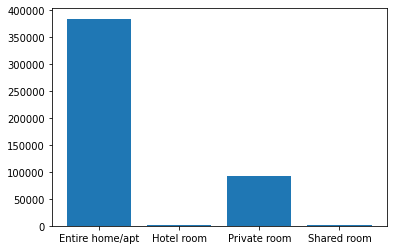

In [28]:
plt.bar(x, y);

#### Does the room’s type influence the rating?

In [29]:
grouped = df[['room_type','review_scores_rating']].groupby('room_type')
x = list(grouped.groups.keys())
y = []
for val in grouped.mean().values:
    y.append(val[0])

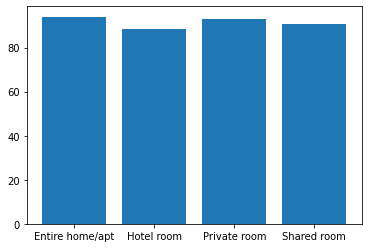

In [30]:
plt.bar(x, y);

In [31]:
### Probably has no influence in at the ratings

#### Does the room’s type influence the price?

In [32]:
grouped = df[['room_type','price']].groupby('room_type')
x = list(grouped.groups.keys())
y = []
for val in grouped.mean().values:
    y.append(val[0])

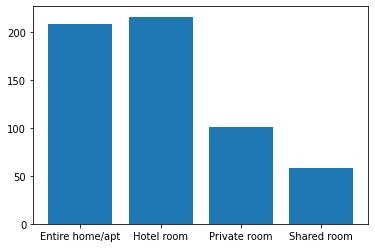

In [33]:
plt.bar(x, y);

#### Does the price correlate with the users' ratings?

In [34]:
n_bins = 20
df_filtered = df[df['review_scores_rating'] >= 0][['price','review_scores_rating']]
grouped = df_filtered.groupby(pd.cut(df_filtered['review_scores_rating'], bins=n_bins))

x = []
for group in list(grouped.groups.keys()):
    x.append(group.right)

y = []
for val in grouped.mean().values:
    y.append(val[0])

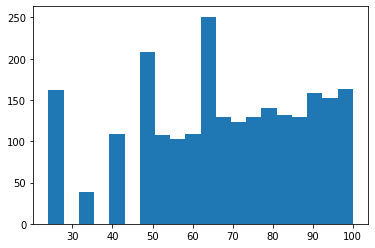

In [35]:
plt.hist(x, bins=n_bins, weights=y);

#### What are the variables that influence the price more?

In [52]:
X = df_ml.drop(['price'], axis=1)
y = df_ml['price']

In [53]:
for col in X.select_dtypes(include=['float']).columns:
    if col != 'reviews_per_month':
        X[col] = X[col].astype('int32')

In [54]:
X = pd.get_dummies(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

#Predict and score the model
y_test_preds = model.predict(X_test) 
"The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model was -6.921192128689644e+27 on 5483 values.'

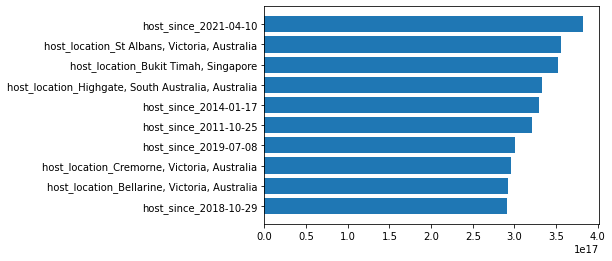

In [70]:
data = {'Features': X.columns, 'Importance': abs(model.coef_)}
df_plot = pd.DataFrame(data)

df_plot.sort_values('Importance', ascending=True, inplace=True)
df_plot = df_plot[-10:]

plt.barh(df_plot['Features'], df_plot['Importance']);